<a href="https://colab.research.google.com/github/MinsooKwak/NLP/blob/main/Article_project/Json%ED%8C%8C%EC%9D%BC%EC%9D%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%EC%9C%BC%EB%A1%9C_%EC%A0%95%EC%A0%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON file DataFrame 만들기

필요한 작업을 수행하기 위해 json 파일을 csv로 변환하고자 한다.

수행하고자 하는 목적과 필요에 따라 [AIHUB의 논문자료 요약 데이터셋](https://aihub.or.kr/aidata/30712)을 사용하였다.

본 데이터셋은 바이브컴퍼니에서 구축하여 제공하였으며, 본 데이터는 2021년 6월에 최초 개방되었다.

### 필요 라이브러리, 기본 작업 수행

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

구글 드라이브

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Training dataset**에 대한 경로로 이동하여 먼저 진행하겠다.

In [4]:
cd /content/drive/MyDrive/data/Article_summary/Training/training_article/

/content/drive/MyDrive/data/Article_summary/Training/training_article


현재 경로에 있는 데이터셋은 다음과 같이 json 형태이다.

In [5]:
ls

논문요약_0206_0.json  논문요약_0206_2.json  논문요약_0225_5_1.json
논문요약_0206_1.json  논문요약_0220_0.json  논문요약_0225_7_0.json


Json 파일을 CSV 파일로 변환하고자 할 때 판다스의 pd.read_json('파일명.json')을 수행하고 이를 pd.to_csv()로 변환할 수 있다.

하지만 어떠한 경우에는 중첩된 사전형식으로 구성되어 원활히 변환되지 않는 경우가 있다.

이를 위한 방법이다.

## JSON

### JSON 파일 불러오기

먼저 첫 번째 파일로 수행해보겠다.

In [6]:
import json
import csv

with open('논문요약_0220_0.json', 'r', encoding = 'utf-8') as input_file:
  data = json.load(input_file)

type(data)

dict

json파일을 읽어 load하여 data에 저장해주었다. 


In [7]:
with open('논문요약_0206_2.json', 'r', encoding = 'utf-8') as input_file:         # 두 번째 논문요약 파일
  data2 = json.load(input_file)

with open('논문요약_0225_5_1.json', 'r', encoding = 'utf-8') as input_file:       # 세 번째 논문요약 파일
  data3 = json.load(input_file)

with open('논문요약_0206_1.json', 'r', encoding = 'utf-8') as input_file:         # 네 번째 논문요약 파일
  data4 = json.load(input_file)

with open('논문요약_0220_0.json', 'r', encoding = 'utf-8') as input_file:         # 다섯 번째 논문요약 파일
  data5 = json.load(input_file)

with open('논문요약_0225_7_0.json', 'r', encoding = 'utf-8') as input_file:       # 여섯 번째 논문요약 파일
  data6 = json.load(input_file)

### key 살펴보기

다음으로 data에 key값이 무엇이 있는지 살펴보겠다.

In [8]:
data.keys()

dict_keys(['totalcount', 'data'])

json 파일을 불러왔는데 key값에 totalcount라는 키가 추가되어 있음이 보인다. 

data의 totalcount key에는 데이터의 개수만이 수록되어있으며, data의 'data'라는 키 안의 정보만 필요하다.

**data의 'totalcount' key**

In [9]:
data['totalcount']

10021

In [10]:
print(f'data에 대한 key   : {data.keys()}')
print(f'data2에 대한 key  : {data2.keys()}')
print(f'data3에 대한 key  : {data3.keys()}')
print(f'data4에 대한 key  : {data4.keys()}')
print(f'data5에 대한 key  : {data5.keys()}')
print(f'data6에 대한 key  : {data6.keys()}')

data에 대한 key   : dict_keys(['totalcount', 'data'])
data2에 대한 key  : dict_keys(['totalcount', 'data'])
data3에 대한 key  : dict_keys(['totalcount', 'data'])
data4에 대한 key  : dict_keys(['totalcount', 'data'])
data5에 대한 key  : dict_keys(['totalcount', 'data'])
data6에 대한 key  : dict_keys(['totalcount', 'data'])


-----

**data의 'data' key** 살펴보기

In [11]:
# key를 통해 첫 째 문장의 valuelist에 접근
data['data'][0]

{'author': '김창대1',
 'date': '2002',
 'doc_id': 'A200928004902',
 'ipc': '사회과학',
 'issued_by': '한국청소년상담복지개발원',
 'reg_no': 'ART000850832',
 'summary_entire': [{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상에 대한 연구로부터 시작되었지만, 현재는 청소년발달이나 스포츠 심리학, 심지어 심리치료분야에까지 널리 영향을 미치고 있다. 본 연구의 목적은 Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 본 연구에서 제시하는 진로상담 모형은 몰입이론에서 주장하듯이 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 따라서 기본적으로 내담자가 흥미와 능력이 균형을 이룬 상태인 몰입을 특정한 영역에서 경험하고 그러한 일에서의 경험이 자신의 진로발달 및 진로결정과도 연결될 수 있도록 돕는 것이 진로상담자의 역할이라고 본다. 본 연구의 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였다. 첫째, 본 진로상담 모형에서는 일이 적응의 대상이 아니라 우리 삶에 즐거움을 주는 원천으로 보고 있다. 둘째, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 셋째, 진로문제는 진로의식의 미성숙과 같은 ‘의식’의 문제가 아니라 ‘일상생활에서 몰입경험의 부재’나 ‘삶의 의미로 통합되지 못한 몰입경험’으로 본다. 따라서 ‘일상생활에서 실제적인 몰입경험’의 중요성을 강조한다. 끝으로 진로상담이 진로선택을 돕는 것을 넘어서 아직 선택의 기점에 놓이지 않은 내담자들에게도 몰입을 경험하게 하고 그것이 생의 의미와 통합될 수 있도록 돕는 것이 진로상담의 주요 기능으로 보고 있다. 본 연구의 후반부에는 몰입이론을 진로상담에 적용했을 때 진로문제의 유형을 4개로 구분하여 제시했으며, 그 후 이

In [12]:
data['data'][0].keys()

dict_keys(['doc_id', 'title', 'date', 'reg_no', 'ipc', 'issued_by', 'author', 'summary_entire', 'summary_section'])

사실 필자의 작업을 수행하는데는 data키 안의 'summary_entire' 부분만 필요하다.

하지만 또 다른 경우 필요할 수 있기 때문에 DataFrame으로 형성 후 전처리를 수행하고, csv파일로 변환해보도록 하겠다.

In [13]:
data['data'][0]['summary_entire']

[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상에 대한 연구로부터 시작되었지만, 현재는 청소년발달이나 스포츠 심리학, 심지어 심리치료분야에까지 널리 영향을 미치고 있다. 본 연구의 목적은 Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 본 연구에서 제시하는 진로상담 모형은 몰입이론에서 주장하듯이 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 따라서 기본적으로 내담자가 흥미와 능력이 균형을 이룬 상태인 몰입을 특정한 영역에서 경험하고 그러한 일에서의 경험이 자신의 진로발달 및 진로결정과도 연결될 수 있도록 돕는 것이 진로상담자의 역할이라고 본다. 본 연구의 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였다. 첫째, 본 진로상담 모형에서는 일이 적응의 대상이 아니라 우리 삶에 즐거움을 주는 원천으로 보고 있다. 둘째, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 셋째, 진로문제는 진로의식의 미성숙과 같은 ‘의식’의 문제가 아니라 ‘일상생활에서 몰입경험의 부재’나 ‘삶의 의미로 통합되지 못한 몰입경험’으로 본다. 따라서 ‘일상생활에서 실제적인 몰입경험’의 중요성을 강조한다. 끝으로 진로상담이 진로선택을 돕는 것을 넘어서 아직 선택의 기점에 놓이지 않은 내담자들에게도 몰입을 경험하게 하고 그것이 생의 의미와 통합될 수 있도록 돕는 것이 진로상담의 주요 기능으로 보고 있다. 본 연구의 후반부에는 몰입이론을 진로상담에 적용했을 때 진로문제의 유형을 4개로 구분하여 제시했으며, 그 후 이 모형을 사용할 때의 실제 사례를 소개하였다.',
  'summary_text': 'Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였고 후반부에는 몰

**key가 totalcount가 아닌 부분만 new_data로 추출하여 저장** 

In [14]:
new_data = {key:value for key,value in data.items() if key !='totalcount'}
type(new_data)

dict

## 데이터프레임

### 데이터프레임 만들기

위와 같이 수행을 해줄 경우 dict 형태로 자라 저장이 되었음을 확인할 수 있지만, 아래와 같이 중첩된 형태로 저장이 되었음을 확인할 수 있다.

이 경우 그냥 데이터프레임으로 만들어줄 경우 한 열에 모든 정보가 다 담기게 된다.

따라서 내부 데이터들을 뽑아내야 한다.

get()를 사용하여 data key에 있는 내용들을 추출할 수 있었다.

In [15]:
new_data.keys()

dict_keys(['data'])

In [16]:
new_data=new_data.get('data')

In [17]:
arti_1= pd.DataFrame(new_data)
arti_1

,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...,[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새...,NaN
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...,[{'orginal_text': '청소년의 정신건강과 복지를 위한 각종 기관의 설립...,NaN
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",[{'orginal_text': '본 연구에서는 아동의 자살생각에 영향을 미치는 가...,[{'orginal_text': '이상과 같은 결과들을 토대로 살펴본 본 연구의 의...,NaN
3,A200928004904,자기애적 성격성향과 청소년 비행성향간의 관계,2002,ART000851793,사회과학,한국청소년상담복지개발원,차타순1,[{'orginal_text': '현대사회는 자기애적 현상이 문화적 흐름으로 강하게...,[{'orginal_text': '본 연구는 자기애적 성격성향과 비행성향에 대하여 ...,NaN
4,A200928004905,청소년의 음란물 접촉과 잘못된 강간통념 수용간의 매개변인과 조정변인의 역할,2002,ART000851794,사회과학,한국청소년상담복지개발원,"고재흥1 , 지영담2",[{'orginal_text': '본 연구에서는 청소년들의 음란물 접촉은 날로 증가...,[{'orginal_text': '대부분의 음란물은 성폭력(sexual violen...,NaN
...,...,...,...,...,...,...,...,...,...,...
10016,A200928014851,IT 과학영재를 위한 다양한 API를 활용하는 프로그램 개발: 다자간 협업 가상공간...,2020,ART002624519,사회과학,한국과학영재교육학회,"이창현1 , 신수민2 , 정성욱3",[{'orginal_text': '최근 IT 과학영재교육에서 효과적인 프로그래밍 교...,"[{'orginal_text': '최근 과학영재교육은, 과학기술의 발달과 과학 영재...",NaN
10017,A200928014852,과학영재학생의 논문에 나타난 서론 서술의 특징,2020,ART002624520,사회과학,한국과학영재교육학회,조광희1,[{'orginal_text': '이 연구에서는 과학영재학생이 작성한 연구 논문의 ...,"[{'orginal_text': '논문을 작성하고 투고하기 위해서는, 해당 전문가 ...",NaN
10018,A200928014853,식물의 수분 스트레스 조기 탐지,2020,ART002624522,사회과학,한국과학영재교육학회,"김미리1 , 김태윤2 , 박주아3 , 서예진4 , 정은서5 , 허윤서6 , 조운행7",[{'orginal_text': '외형적인 증상이 나타나기 전에 수분 스트레스의 조...,[{'orginal_text': '물은 모든 생명체에게 필요하고 그 역할 또한 다양...,NaN
10019,A200928014854,3인 일반형 게임에서 유효 전략의 가능성에 관한 연구,2020,ART002624523,사회과학,한국과학영재교육학회,"심민규1 , 이찬혁2 , 김민재3 , 송상헌4",[{'orginal_text': '죄수의 딜레마에는 여러 가지 변형이 있다. 로버트...,[{'orginal_text': '게임 이론은 개인 간의 상호작용을 논리적으로 설명...,NaN


첫 번째 json 파일을 데이터프레임 형식으로 변환하는 것에 성공했다.


각 json파일에 수록된 데이터의 개수는 다르다.

In [18]:
data2['totalcount']

6259

In [19]:
data3['totalcount']

32000

In [20]:
data3['totalcount']

32000

In [21]:
data4['totalcount']

32000

In [22]:
data5['totalcount']

10021

In [23]:
data6['totalcount']

32000

**data키만 저장**

In [24]:
new2_data = {key:value for key,value in data2.items() if key !='totalcount'}
new3_data = {key:value for key,value in data3.items() if key !='totalcount'}
new4_data = {key:value for key,value in data4.items() if key !='totalcount'}
new5_data = {key:value for key,value in data5.items() if key !='totalcount'}
new6_data = {key:value for key,value in data6.items() if key !='totalcount'}

**데이터셋만 뽑아내어 다시 저장**

In [25]:
new2_data=new2_data.get('data')
new3_data=new3_data.get('data')
new4_data=new4_data.get('data')
new5_data=new5_data.get('data')
new6_data=new6_data.get('data')

In [26]:
arti_2= pd.DataFrame(new2_data)
arti_3= pd.DataFrame(new3_data)
arti_4= pd.DataFrame(new4_data)
arti_5= pd.DataFrame(new5_data)
arti_6= pd.DataFrame(new6_data)

다음으로 진행할 것은 이 json 파일들을 합쳐줄 것이다.

하나의 데이터프레임으로 구성한 후에 전처리를 수행한다.

In [27]:
print(arti_1.shape)
print(arti_2.shape)
print(arti_3.shape)
print(arti_4.shape)
print(arti_5.shape)
print(arti_6.shape)

(10021, 10)
(6259, 10)
(32000, 10)
(32000, 10)
(10021, 10)
(32000, 10)


### 하나의 데이터프레임으로 결합

In [28]:
df= pd.concat([arti_1,arti_2,arti_3,arti_4,arti_5,arti_6],axis=0) # 위 아래로 이어붙여줄 것이다.
df.shape

(122301, 10)

In [29]:
df

,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...,[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새...,NaN
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...,[{'orginal_text': '청소년의 정신건강과 복지를 위한 각종 기관의 설립...,NaN
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",[{'orginal_text': '본 연구에서는 아동의 자살생각에 영향을 미치는 가...,[{'orginal_text': '이상과 같은 결과들을 토대로 살펴본 본 연구의 의...,NaN
3,A200928004904,자기애적 성격성향과 청소년 비행성향간의 관계,2002,ART000851793,사회과학,한국청소년상담복지개발원,차타순1,[{'orginal_text': '현대사회는 자기애적 현상이 문화적 흐름으로 강하게...,[{'orginal_text': '본 연구는 자기애적 성격성향과 비행성향에 대하여 ...,NaN
4,A200928004905,청소년의 음란물 접촉과 잘못된 강간통념 수용간의 매개변인과 조정변인의 역할,2002,ART000851794,사회과학,한국청소년상담복지개발원,"고재흥1 , 지영담2",[{'orginal_text': '본 연구에서는 청소년들의 음란물 접촉은 날로 증가...,[{'orginal_text': '대부분의 음란물은 성폭력(sexual violen...,NaN
...,...,...,...,...,...,...,...,...,...,...
31995,A220223614301,"저소득층 학생의 학교 적응, 수업 태도, 학업 성취에 대한 사회적 자본의 영향 분석",2017,ART9002279065,사회과학,한국교육개발원,"류방란 /Bangran Ryu,김성식",[{'orginal_text': '이 연구는 저소득층 학생의 교육적 취약성과 가능성...,[{'orginal_text': '이 연구는 전국적인 데이터를 활용하여 저소득층 학...,논문
31996,A220223614302,단어의 정서가와 각성가가 우연학습 이후 기억에 미치는 영향,2017,ART9002280350,사회과학,한국인지및생물심리학회,"남예은,이윤형",[{'orginal_text': '본 연구의 목적은 단어의 정서적 특성이 어휘판단 ...,[{'orginal_text': '사건에 대한 정서적인 정보는 이와 같은 기억의 처...,논문
31997,A220223614303,수학수업에 대한 초등교사의 인식 조사,2017,ART9002280577,사회과학,한국수학교육학회,권성룡,[{'orginal_text': '본 연구는 초등수학수업의 개선을 목표로 초등교사의...,[{'orginal_text': '최근에 이뤄진 몇 차례의 수학과 교육과정 개정 노...,논문
31998,A220223614304,SW영재의 학업탄력성과 자아상태 비교,2017,ART9002280639,복합학,한국창의정보문화학회,"이재호 /Lee Jaeho,김동현 /Donghyun Kim",[{'orginal_text': '본 논문은 SW영재의 학업탄력성과 자아상태를 확인...,[{'orginal_text': '2015년 통계청의 아동 청소년 대상 학업 관련 ...,논문


### 결측치 확인

In [30]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

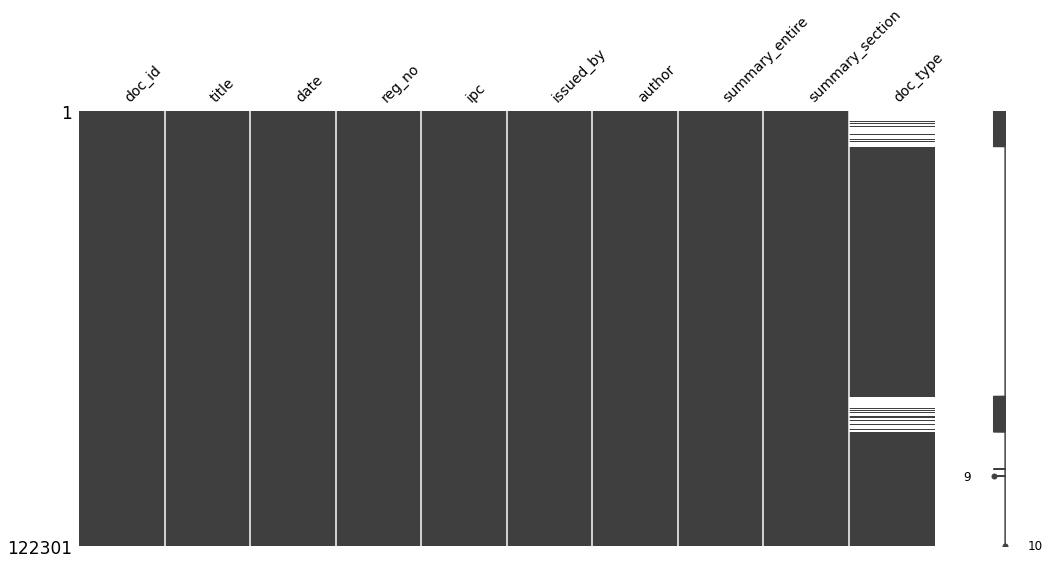

In [31]:
%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

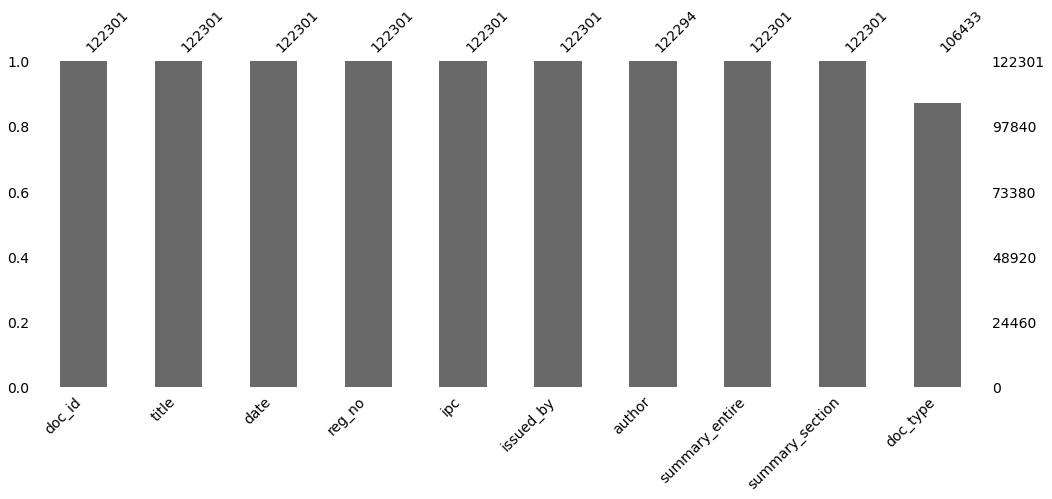

In [32]:
msno.bar(df, figsize=(17,6), fontsize=14);

결측치를 확인해본 결과 doc_type에 누락된 데이터가 있음을 확인할 수 있습니다.

그러나 본 데이터 상에서는 doc_type이 논문으로 동일하기 때문에 nan값을 '논문'으로 추가해주거나, doc_type을 제거하는 방법을 쓸 수 있습니다.

뚜렷하게 보이는 것은 doc_type의 결측치이지만, 다른 결측치를 간과해선 안됩니다.

정확한 결측치의 비율을 확인해보겠습니다.

In [33]:
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")

author's null rate : 0.01%
doc_type's null rate : 12.97%


저자를 누락시킨 부분이 있네요. 우선 doc_type을 먼저 처리하겠습니다.

In [34]:
df['doc_type'].isna().sum()

15868

In [35]:
df['doc_type'].fillna('논문',inplace=True)

In [36]:
df.doc_type.isna().sum()

0

In [37]:
na_condition = df.loc[df['author'].isna()]
na_condition

,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section,doc_type
10426,A220223592730,북한 김정은 시대의 고급중학교 1 화학 교과서의 탐구 경향성 분석,2019,ART9002491831,자연과학,대한화학회,NaN,[{'orginal_text': '본 연구는 북한 김정은 시대의 화학 교과서의 탐구...,[{'orginal_text': '최근 1~2년 동안 남한과 북한의 관계가 급진적으...,논문
10427,A220223592731,초등교사의 과학적 탐구 이해의 수준과 실태 분석,2019,ART9002491832,자연과학,대한화학회,NaN,[{'orginal_text': '본 연구는 초등교사의 과학적 탐구에 관한 이해 수...,[{'orginal_text': '지난 20년간의 과학교육 개혁에서는 학생의 과학적...,논문
10428,A220223592732,2009 및 2015 개정 교육과정의 화학 교과서에서 모델 관련 내용 분석: 수용액...,2019,ART9002491833,자연과학,대한화학회,NaN,[{'orginal_text': '이 연구에서는 2015 개정 교육과정의 교과서에서...,[{'orginal_text': '2013년도에 발표된 미국의 차세대 과학교육표준에...,논문
12444,A220223594750,염산과 황산 용액에서 코발트의 부식에 미치는 아미노산의 부식억제효과,2019,ART9002513804,자연과학,대한화학회,NaN,"[{'orginal_text': '코발트의 부식에 대한 시스테인(Cys), 메티오닌...","[{'orginal_text': '코발트(Cobalt, Co)는 다른 철족 금속(f...",논문
12446,A220223594752,LC-MS/MS를 이용한 동물 사료 내 글라이포세이트 및 글루포시네이트 분석,2019,ART9002513806,자연과학,대한화학회,NaN,[{'orginal_text': '식품에서 글라이포세이트와 글루포시네이트의 함량 기...,[{'orginal_text': '글라이포세이트와 글루포시네이트는 살포된 지역의 모...,논문
12447,A220223594753,교사학습공동체 활동을 한 초임중등과학교사의 과학 탐구 수업에 대한 인식,2019,ART9002513809,자연과학,대한화학회,NaN,[{'orginal_text': '본 연구는 교사학습공동체에서 과학 탐구 수업이라는...,[{'orginal_text': '우리나라는 3차 과학과 교육과정에 과학 탐구의 중...,논문
12448,A220223594754,산과 염기 화학반응에서 논리 사고 학습발달단계 탐색,2019,ART9002513810,자연과학,대한화학회,NaN,[{'orginal_text': '이 연구에서는 산과 염기의 화학반응에 대한 학습발...,[{'orginal_text': '수많은 학생이 수년에 걸친 교육을 받은 후에도 오...,논문


대한화학회에서 출판한 것으로 author는 '대한화학회'로 대체하겠습니다.

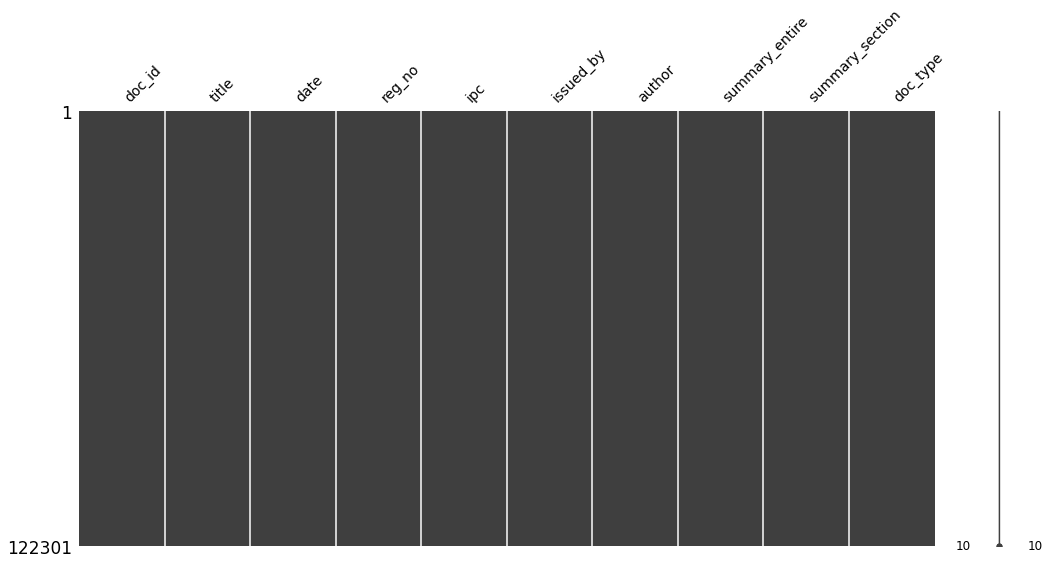

In [38]:
df.fillna('대한화학회',inplace=True)

%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

결측치가 제거된 것을 확인할 수 있습니다.

**인덱스를 재배열**

In [39]:
df.reset_index(drop=True, inplace=True)
df

,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...,[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...,[{'orginal_text': '청소년의 정신건강과 복지를 위한 각종 기관의 설립...,논문
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",[{'orginal_text': '본 연구에서는 아동의 자살생각에 영향을 미치는 가...,[{'orginal_text': '이상과 같은 결과들을 토대로 살펴본 본 연구의 의...,논문
3,A200928004904,자기애적 성격성향과 청소년 비행성향간의 관계,2002,ART000851793,사회과학,한국청소년상담복지개발원,차타순1,[{'orginal_text': '현대사회는 자기애적 현상이 문화적 흐름으로 강하게...,[{'orginal_text': '본 연구는 자기애적 성격성향과 비행성향에 대하여 ...,논문
4,A200928004905,청소년의 음란물 접촉과 잘못된 강간통념 수용간의 매개변인과 조정변인의 역할,2002,ART000851794,사회과학,한국청소년상담복지개발원,"고재흥1 , 지영담2",[{'orginal_text': '본 연구에서는 청소년들의 음란물 접촉은 날로 증가...,[{'orginal_text': '대부분의 음란물은 성폭력(sexual violen...,논문
...,...,...,...,...,...,...,...,...,...,...
122296,A220223614301,"저소득층 학생의 학교 적응, 수업 태도, 학업 성취에 대한 사회적 자본의 영향 분석",2017,ART9002279065,사회과학,한국교육개발원,"류방란 /Bangran Ryu,김성식",[{'orginal_text': '이 연구는 저소득층 학생의 교육적 취약성과 가능성...,[{'orginal_text': '이 연구는 전국적인 데이터를 활용하여 저소득층 학...,논문
122297,A220223614302,단어의 정서가와 각성가가 우연학습 이후 기억에 미치는 영향,2017,ART9002280350,사회과학,한국인지및생물심리학회,"남예은,이윤형",[{'orginal_text': '본 연구의 목적은 단어의 정서적 특성이 어휘판단 ...,[{'orginal_text': '사건에 대한 정서적인 정보는 이와 같은 기억의 처...,논문
122298,A220223614303,수학수업에 대한 초등교사의 인식 조사,2017,ART9002280577,사회과학,한국수학교육학회,권성룡,[{'orginal_text': '본 연구는 초등수학수업의 개선을 목표로 초등교사의...,[{'orginal_text': '최근에 이뤄진 몇 차례의 수학과 교육과정 개정 노...,논문
122299,A220223614304,SW영재의 학업탄력성과 자아상태 비교,2017,ART9002280639,복합학,한국창의정보문화학회,"이재호 /Lee Jaeho,김동현 /Donghyun Kim",[{'orginal_text': '본 논문은 SW영재의 학업탄력성과 자아상태를 확인...,[{'orginal_text': '2015년 통계청의 아동 청소년 대상 학업 관련 ...,논문


### 전처리

In [40]:
df.head(2)

,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...,[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...,[{'orginal_text': '청소년의 정신건강과 복지를 위한 각종 기관의 설립...,논문


필자가 현재 필요한 것은 summary_entire 부분과 summary_selection 부분으로 다른 부분보단 이 두 feature에 집중하겠습니다.


In [41]:
df.summary_entire[0]

[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상에 대한 연구로부터 시작되었지만, 현재는 청소년발달이나 스포츠 심리학, 심지어 심리치료분야에까지 널리 영향을 미치고 있다. 본 연구의 목적은 Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 본 연구에서 제시하는 진로상담 모형은 몰입이론에서 주장하듯이 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 따라서 기본적으로 내담자가 흥미와 능력이 균형을 이룬 상태인 몰입을 특정한 영역에서 경험하고 그러한 일에서의 경험이 자신의 진로발달 및 진로결정과도 연결될 수 있도록 돕는 것이 진로상담자의 역할이라고 본다. 본 연구의 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였다. 첫째, 본 진로상담 모형에서는 일이 적응의 대상이 아니라 우리 삶에 즐거움을 주는 원천으로 보고 있다. 둘째, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 셋째, 진로문제는 진로의식의 미성숙과 같은 ‘의식’의 문제가 아니라 ‘일상생활에서 몰입경험의 부재’나 ‘삶의 의미로 통합되지 못한 몰입경험’으로 본다. 따라서 ‘일상생활에서 실제적인 몰입경험’의 중요성을 강조한다. 끝으로 진로상담이 진로선택을 돕는 것을 넘어서 아직 선택의 기점에 놓이지 않은 내담자들에게도 몰입을 경험하게 하고 그것이 생의 의미와 통합될 수 있도록 돕는 것이 진로상담의 주요 기능으로 보고 있다. 본 연구의 후반부에는 몰입이론을 진로상담에 적용했을 때 진로문제의 유형을 4개로 구분하여 제시했으며, 그 후 이 모형을 사용할 때의 실제 사례를 소개하였다.',
  'summary_text': 'Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였고 후반부에는 몰

In [42]:
df['summary_section'][0]

[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다. 몰입의 이론적 모형에 근거한 진로상담은 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 몰입의 이론적 모형에 근거한 진로상담은 기존의 진로상담이론들과 다음과 같은 점에서 차이점을 가지고 있다. 첫째, 몰입이론은 일에 대한 새로운 시각을 제시해준다. 일에 대해 몰입 개념의 시각에서 접근할 경우 일이나 직업의 세계는 적응해야하는 대상이 아니라 우리들의 삶에 즐거움을 주는 원천으로 볼 수 있다. 둘째, 몰입이론의 관점에서 볼 때, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 이는 최근 상담 및 심리학계의 새로운 조류인 ‘긍정적 신리학’의 정신과도 일치한다. 셋째, 전통적인 진로상담이론에서는 흥미와 적성, 즐거움과 유능함이 배타적인 개념이라고 가정하고 흥미와 적성 사이의 어딘가에서 내담자가 합리적이고도 현실적으로 진로를 선택하도록 하는 것이 진로상담자의 역할이라고 보는 반면, 몰입의 이론적 모형에 근거한 진로상담에서는 흥미와 능력은 동시에 얻을 수 있으며, 내담자가 흥미와 능력이 동시에 발현하기 위한 실마리인 몰입현상을 발견하고 느끼도록 돕는 것이 진로상담자의 역할이라고 본다. ',
  'summary_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 몰입의 이론적 모형에 근거한 진로상담은 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 또한 몰입의 이론적 모형에 근거한 진로상담은 기존의 진로상담이론들과 다음과 같은 점에서 차이점을 가지고 있다.'}]

본래 데이터에서 summary_entire부분과 summary_section 부분이 존재하는데, 두 feature 모두 원 텍스트와 이를 기반으로 요약한 부분이 존재한다. 

original_text와 summary_text 부분으로 작성이 되어있는데, 작성된 형식이 다름을 알 수 있다.

- summary_entire: 원 텍스트에 들어간 단어를 기반으로 형성된 문장이 아니라 새롭게 형성된 요약문임으 확인할 수 있다.
- summart_section: summary_entire과 다르게 원 텍스트에 빈번하게 들어간 단어를 기반으로 문장을 형성하고 있음을 알 수 있다. 

---

- 목적에 따라 다르게 활용할 수 있는 부분이기 때문에 데이터를 정제 후 해당 feature를 저장시킬 것이다.
- str 형식으로 변환하였기 때문에 split()를 통해 해당 텍스트를 두 부분으로 나누고 replace()를 통해 필요 없는 부부을 처리해줄 것이다.

In [43]:
df.summary_entire[0][0]

{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상에 대한 연구로부터 시작되었지만, 현재는 청소년발달이나 스포츠 심리학, 심지어 심리치료분야에까지 널리 영향을 미치고 있다. 본 연구의 목적은 Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 본 연구에서 제시하는 진로상담 모형은 몰입이론에서 주장하듯이 개인이 일에서 추구하고자 하는 즐거움과 유능함을 동시에 얻는 것이 가능하다는 전제에서 출발한다. 따라서 기본적으로 내담자가 흥미와 능력이 균형을 이룬 상태인 몰입을 특정한 영역에서 경험하고 그러한 일에서의 경험이 자신의 진로발달 및 진로결정과도 연결될 수 있도록 돕는 것이 진로상담자의 역할이라고 본다. 본 연구의 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였다. 첫째, 본 진로상담 모형에서는 일이 적응의 대상이 아니라 우리 삶에 즐거움을 주는 원천으로 보고 있다. 둘째, 진로상담의 목표는 적응을 넘어 재능의 발달로 확장된다. 셋째, 진로문제는 진로의식의 미성숙과 같은 ‘의식’의 문제가 아니라 ‘일상생활에서 몰입경험의 부재’나 ‘삶의 의미로 통합되지 못한 몰입경험’으로 본다. 따라서 ‘일상생활에서 실제적인 몰입경험’의 중요성을 강조한다. 끝으로 진로상담이 진로선택을 돕는 것을 넘어서 아직 선택의 기점에 놓이지 않은 내담자들에게도 몰입을 경험하게 하고 그것이 생의 의미와 통합될 수 있도록 돕는 것이 진로상담의 주요 기능으로 보고 있다. 본 연구의 후반부에는 몰입이론을 진로상담에 적용했을 때 진로문제의 유형을 4개로 구분하여 제시했으며, 그 후 이 모형을 사용할 때의 실제 사례를 소개하였다.',
 'summary_text': 'Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다. 전반부에서는 몰입이론에 근거한 진로상담이 기존의 진로상담과 구별되는 점을 다음과 같이 기술하였고 후반부에는 몰입이

전처리를 위해 summary_entire 부분을 추출하여 작업을 진행하겠다.

In [44]:
entire_sum = df['summary_entire']
entire_sum = pd.DataFrame(entire_sum)
entire_sum

,summary_entire
0,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...
1,[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...
2,[{'orginal_text': '본 연구에서는 아동의 자살생각에 영향을 미치는 가...
3,[{'orginal_text': '현대사회는 자기애적 현상이 문화적 흐름으로 강하게...
4,[{'orginal_text': '본 연구에서는 청소년들의 음란물 접촉은 날로 증가...
...,...
122296,[{'orginal_text': '이 연구는 저소득층 학생의 교육적 취약성과 가능성...
122297,[{'orginal_text': '본 연구의 목적은 단어의 정서적 특성이 어휘판단 ...
122298,[{'orginal_text': '본 연구는 초등수학수업의 개선을 목표로 초등교사의...
122299,[{'orginal_text': '본 논문은 SW영재의 학업탄력성과 자아상태를 확인...


텍스트 전처리를 위해 해당 텍스트를 문자열 형식으로 변환해준다.

In [45]:
entire_sum = entire_sum.astype(str)

In [46]:
def text_original(str):
  '''
  불필요한 요소를 제거하고, original_text와 summary_text를 분리한다.
  text_original에서는 앞 부분에 위치한 original document를 반환한다.
  '''
  str = str.replace("[{'orginal_text': '",'')
  str = str.replace("\n",'')
  str = str.replace("'}]",'')
  str = str.replace("'",'')
  str = str = str.split("'summary_text':")
  return str[0]

def text_summary(str):
  '''
  불필요한 요소를 제거하고, original_text와 summary_text를 분리한다.
  text_summary에서는 뒷 부분에 위치한 summary document를 반환한다.
  '''
  str = str.replace("[{'orginal_text': ",'')
  str = str.replace("\n",'')
  str = str.replace("'}]",'')
  str = str.replace("'",'')
  str = str.split(", summary_text: ")
  return str[1]

In [47]:
entire_sum['entire_original']= entire_sum['summary_entire'].apply(text_original)
entire_sum['entire_summary'] = entire_sum['summary_entire'].apply(text_summary)

In [48]:
entire_sum

,summary_entire,entire_original,entire_summary
0,[{'orginal_text': '몰입이론은 원래 창조적인 활동을 하는 사람들이 자...,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...
1,[{'orginal_text': '본 연구는 지역사회 청소년 상담기관에서 실제로 상...,본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...
2,[{'orginal_text': '본 연구에서는 아동의 자살생각에 영향을 미치는 가...,본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...
3,[{'orginal_text': '현대사회는 자기애적 현상이 문화적 흐름으로 강하게...,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을..."
4,[{'orginal_text': '본 연구에서는 청소년들의 음란물 접촉은 날로 증가...,"본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...
...,...,...,...
122296,[{'orginal_text': '이 연구는 저소득층 학생의 교육적 취약성과 가능성...,이 연구는 저소득층 학생의 교육적 취약성과 가능성 탐색의 맥락에서 저소득층 학생과 ...,본 논문은 저소득층 학생의 교육적 취약성과 가능성 탐색의 맥락에서 저소득층 학생과 ...
122297,[{'orginal_text': '본 연구의 목적은 단어의 정서적 특성이 어휘판단 ...,본 연구의 목적은 단어의 정서적 특성이 어휘판단 이후 그 단어의 기억에 미치는 영향...,단어의 정서적 특성이 어휘판단 후 그 단어의 기억에 미치는 영향을 살펴보았다. 구체...
122298,[{'orginal_text': '본 연구는 초등수학수업의 개선을 목표로 초등교사의...,본 연구는 초등수학수업의 개선을 목표로 초등교사의 수학수업에 대한 인식을 조사함으로...,초등수학수업의 개선을 목표로 초등교사의 수학수업에 대한 인식을 조사함으로써 수학수업...
122299,[{'orginal_text': '본 논문은 SW영재의 학업탄력성과 자아상태를 확인...,본 논문은 SW영재의 학업탄력성과 자아상태를 확인하고 두 요인 간의 관계를 분석하기...,본 연구는 SW영재의 학업탄력성과 자아상태를 확인하고 두 요인 간의 관계를 분석하고...


entire_sum 데이터프레임에서 summary_entire부분은 기존의 feature를 담고있다.

전처리를 통해 형성된 entire_original feature와 entire_summary부분이 있다.

- entire original의 경우 새롭게 형성될 문장의 원 텍스트를 담고있다.


- entire summary의 경우 단어 기반이 아닌 이를 기반으로 새롭게 형성되는 문장을 담고있는 feature이다.

기존의 데이터프레임에 summary_entire를 제거하고 entire_original과 entire_summary를 넣어 feature engineering 해줄 것이다.

한번에 처리하기 위해 summary_section에 대한 작업도 수행해준다.

In [49]:
summary_sum = df['summary_section']
summary_sum = pd.DataFrame(summary_sum)

summary_sum = summary_sum.astype(str)

summary_sum['summary_original']= summary_sum['summary_section'].apply(text_original)
summary_sum['summary_summary'] = summary_sum['summary_section'].apply(text_summary)
summary_sum

,summary_section,summary_original,summary_summary
0,[{'orginal_text': '이상에서 필자는 몰입이론을 진로상담에 적용하여 새...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...
1,[{'orginal_text': '청소년의 정신건강과 복지를 위한 각종 기관의 설립...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...
2,[{'orginal_text': '이상과 같은 결과들을 토대로 살펴본 본 연구의 의...,이상과 같은 결과들을 토대로 살펴본 본 연구의 의의 및 시사점은 다음과 같다. 우선...,"자살행동의 저연령화에 충격을 받고 있는 시기에, 본 연구는 초등학교 아동들을 대상으..."
3,[{'orginal_text': '본 연구는 자기애적 성격성향과 비행성향에 대하여 ...,본 연구는 자기애적 성격성향과 비행성향에 대하여 알아보고자 하였다. 본 연구에서 다...,자기애적 성격성향과 비행성향에 대하여 알아보고자 하였고 이런 구성개념은 자기애와 청...
4,[{'orginal_text': '대부분의 음란물은 성폭력(sexual violen...,대부분의 음란물은 성폭력(sexual violence)을 담고 있다. 음란물에서 나...,음란물에서 나타나는 전형적인 성폭력 상황은 여성이 처음에는 남성의 공격에 강하게 저...
...,...,...,...
122296,[{'orginal_text': '이 연구는 전국적인 데이터를 활용하여 저소득층 학...,이 연구는 전국적인 데이터를 활용하여 저소득층 학생의 교육 성취에 대한 사회적 자본...,이 연구는 전국적인 데이터를 활용하여 저소득층 학생의 교육 성취에 대한 사회적 자본...
122297,[{'orginal_text': '사건에 대한 정서적인 정보는 이와 같은 기억의 처...,사건에 대한 정서적인 정보는 이와 같은 기억의 처리과정에 영향을 미칠 수 있는 중요...,"정서가 기억처리과정에 도움을 준다고 주장하는 이들은 정서자극이 중립자극보다 친숙성,..."
122298,[{'orginal_text': '최근에 이뤄진 몇 차례의 수학과 교육과정 개정 노...,최근에 이뤄진 몇 차례의 수학과 교육과정 개정 노력의 결과를 살펴볼 수 있는 방법 ...,"TIMSS와 PISA 결과 분석 연구에 따르면, 우리나라 학생들의 수학 성취는 인지..."
122299,[{'orginal_text': '2015년 통계청의 아동 청소년 대상 학업 관련 ...,2015년 통계청의 아동 청소년 대상 학업 관련 스트레스 정도 조사에 따르면 매우 ...,학업 상황에서의 스트레스로 인한 문제를 극복하는 대안으로 학업탄력성이 제시되고 있다...


In [50]:
df['entire_original'] = entire_sum['entire_original']
df['entire_summary']  = entire_sum['entire_summary']
df['summary_original'] = summary_sum['summary_original']
df['summary_summary'] = summary_sum['summary_summary']

df.drop(columns=['summary_entire','summary_section'],axis=1,inplace=True)
df.columns

Index(['doc_id', 'title', 'date', 'reg_no', 'ipc', 'issued_by', 'author',
       'doc_type', 'entire_original', 'entire_summary', 'summary_original',
       'summary_summary'],
      dtype='object')

In [51]:
df = df[['doc_id','title','date','reg_no','ipc','issued_by','author','entire_original','entire_summary','summary_original','summary_summary','doc_type']]
df.head()

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,논문
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,이상과 같은 결과들을 토대로 살펴본 본 연구의 의의 및 시사점은 다음과 같다. 우선...,"자살행동의 저연령화에 충격을 받고 있는 시기에, 본 연구는 초등학교 아동들을 대상으...",논문
3,A200928004904,자기애적 성격성향과 청소년 비행성향간의 관계,2002,ART000851793,사회과학,한국청소년상담복지개발원,차타순1,"현대사회는 자기애적 현상이 문화적 흐름으로 강하게 자리잡고 있고, 우리나라에도 이 ...","자기애적 성격성향과 청소년 비행성향 간의 관계를 알아보고, 청소년 비행성향에 영향을...",본 연구는 자기애적 성격성향과 비행성향에 대하여 알아보고자 하였다. 본 연구에서 다...,자기애적 성격성향과 비행성향에 대하여 알아보고자 하였고 이런 구성개념은 자기애와 청...,논문
4,A200928004905,청소년의 음란물 접촉과 잘못된 강간통념 수용간의 매개변인과 조정변인의 역할,2002,ART000851794,사회과학,한국청소년상담복지개발원,"고재흥1 , 지영담2","본 연구에서는 청소년들의 음란물 접촉은 날로 증가하지만, 이를 효과적으로 차단하기 ...",청소년들의 음란물 접촉은 날로 증가하지만 이를 효과적으로 차단하기 힘든 현 상황에서...,대부분의 음란물은 성폭력(sexual violence)을 담고 있다. 음란물에서 나...,음란물에서 나타나는 전형적인 성폭력 상황은 여성이 처음에는 남성의 공격에 강하게 저...,논문


In [52]:
# csv 파일 import 후 issued_by와 author 부분에서 빈 값이 발생하는 것을 확인하였다.
# 본래 데이터프레임에서 역시 값이 형성되지 않은 부분인지 확인해주기 위해 확인해본다.

df.iloc[[16287,16294]]

''' 
전처리 후에 빈 텍스트 형식으로 해당값이 형성되어 있을 수 있음을 발견하였다.
json 파일에서 csv 파일로 불러오는 초기에 발견되지 않는 결측치가 이후에 발견될 수도 있다.
이 부분에 대해서는 추가적인 처리가 필요할 것으로 예상된다.
해당 부분 확인 후 isna()를 통해 결측치 확인을 해주었지만 해당 결측치에 대한 부분은 인식하지 못하는 것을 발견할 수 있다.
'''

' \n전처리 후에 빈 텍스트 형식으로 해당값이 형성되어 있을 수 있음을 발견하였다.\njson 파일에서 csv 파일로 불러오는 초기에 발견되지 않는 결측치가 이후에 발견될 수도 있다.\n이 부분에 대해서는 추가적인 처리가 필요할 것으로 예상된다.\n해당 부분 확인 후 isna()를 통해 결측치 확인을 해주었지만 해당 결측치에 대한 부분은 인식하지 못하는 것을 발견할 수 있다.\n'

본 데이터프레임을 csv 파일로 형성하기 전에 결측된 부분이 없는지 다시 한 번 확인해줍니다.

In [53]:
df.isna().sum()

doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

## CSV 파일 변환

In [54]:
df.to_csv('train_article.csv', index=False, encoding='utf-8') # index False 처리를 해서 저장해줍니다. 
# 본 파일을 원활하게 호출할 때 utf-8로 encoding시켜주었으므로 csv 파일로 변환할 때도 utf-8 형식으로 저장해주겠습니다.

In [55]:
ls

논문요약_0206_0.json  논문요약_0220_0.json    train_article.csv
논문요약_0206_1.json  논문요약_0225_5_1.json
논문요약_0206_2.json  논문요약_0225_7_0.json


csv 파일이 생성된 것을 볼 수 있습니다.

다음으로 해당 csv 파일을 불러와 다시 확인해봅니다.

In [56]:
train = pd.read_csv('train_article.csv')
train.head(3)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A200928004902,몰입(Flow) 이론을 적용한 진로상담모형,2002,ART000850832,사회과학,한국청소년상담복지개발원,김창대1,몰입이론은 원래 창조적인 활동을 하는 사람들이 자신의 일에 몰입할 때 경험하는 현상...,Csikszentmihalyi의 몰입이론을 적용한 진로상담의 모형을 제시하는 것이다...,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았다....,이상에서 필자는 몰입이론을 진로상담에 적용하여 새로운 진로상담 모형을 모색해보았고 ...,논문
1,A200928004903,지역사회 청소년 상담기관의 실제와 연계체제 활성화 방안에 관한 현장 연구: 안양지역...,2002,ART000850833,사회과학,한국청소년상담복지개발원,"김계현1 , 김수임2 , 김영혜3",본 연구는 지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접...,지역사회 청소년 상담기관에서 실제로 상담업무를 담당하는 실무자들과의 면접조사를 통해...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,청소년의 정신건강과 복지를 위한 각종 기관의 설립 및 서비스 사업이 활발하게 이루어...,논문
2,A200928005043,아동의 자살 생각에 영향을 미치는 가족 위험요인,2003,ART000851706,사회과학,한국청소년상담복지개발원,"이정윤1 , 허재홍2",본 연구에서는 아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다. ...,아동의 자살생각에 영향을 미치는 가족 위험요인을 알아보고자 하였다.\n집단간 가족특...,이상과 같은 결과들을 토대로 살펴본 본 연구의 의의 및 시사점은 다음과 같다. 우선...,"자살행동의 저연령화에 충격을 받고 있는 시기에, 본 연구는 초등학교 아동들을 대상으...",논문


### 변환된 train csv 파일 결측치 확인

잘 불러와지는 것을 확인할 수 있으며, 다시 한 번 결측치가 발생되는지 확인해주겠습니다.

In [57]:
train.isna().sum()

doc_id                  0
title                   0
date                    0
reg_no                  0
ipc                     0
issued_by            1197
author              25434
entire_original         0
entire_summary         22
summary_original        0
summary_summary        12
doc_type                0
dtype: int64

### 변환된 csv 파일 결측치에 대한 원인 규명 및 해결 방안 구축

----

**의문:** 

해당 데이터셋 전처리 후 파일을 csv 파일로 저장해주었는데, 이 과정에서 결측치가 발생됨을 볼 수 있습니다.

이 부분에 대한 원인을 알아내야합니다. 

----

**--> 1. encoding 부분 시도**

해당 부분을 해결하기 위해 encoding 형식을 해당 파일 import시처럼 'utf-8'로 처리해주었으나, 동일하게 결측치가 발생하는 것으로 나타났습니다.
만약 해결이 어려울 경우 해당 csv 파일 import시 다시 결측치 처리와 전처리가 필요할 것으로 예상됩니다. 

**--> 2. 결측치 처리 부분 추출**

해당 부분이 csv 파일 변환 전 isna()를 통해 확인이 어렵지만, 해당 값 설정이 되어있지 않았습니다. (원인 발견)

이에 대한 부분은 추가 처리가 필요합니다.

- issued_by의 경우 논문이 어디에서 출판되었는가를 나타냅니다.
  - 해당 논문 제목을 통해 어디에서 출판되었는지 확인할 수 있습니다.
  - 1000개가 넘는 결측치를 보유하고 있기 때문에 본 과제에서는 수행하지 않도록 하겠습니다.
    - 해당 결측값을 이를 대체할 값으로 대체하고 진행해주겠습니다.
      - Imputation에는 결측치를 대체해줄 여러 방법들이 존재하지만, 해당 값의 경우 본래 목적에 맞는 데이터값이 존재하고 찾을 수 있는 부분이기 때문에 현 진행 과정에서는 대체할 특정 값을 설정하고 넘어가도록 하겠습니다. 

- author에 대한 경우도 마찬가지입니다.

  25000개를 넘는 결측치를 보유하고 있습니다.

  - 해당 논문제목을 통해 author 부분을 찾을 수 있지만, 25000개가 넘는 결측치를 가지고 있는 것을 볼 수 있습니다.
    - 본 목적과 관계없는 부분이며
    - 시간의 한정성이 있기 때문에 해당 부분은 진행하지 않고 결측치를 표현 할 값으로 대체해주겠습니다.

----

**train csv에 결측치가 있는 부분 확인**

In [58]:
na_condition_plus = train.loc[train['issued_by'].isna()]
na_condition_plus

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
16287,A220223614313,인도 신화에 나타난 Haṭhayoga 수행생리학,2017,ART9002281802,사회과학,NaN,NaN,본 논문에서는 인도 신화에 나타난 상징에 대한 요가생리학적 분석을 시도할 것이다. ...,이 논문에서는 인도 신화에 나타난 상징에 관한 요가생리학적 분석을 시도할 것이다. ...,‘우유바다 휘젓기 신화’(K??rodamathana)는 이 세상을 위기로부터 구하는...,<우유바다 휘젓기 신화>는 위쉬누(Vi??u)가 이야기의 능동적인 주체로 등장한다.,논문
16294,A220223614320,아이트래킹 및 음성인식 기술을 활용한 지체장애인 컴퓨터 접근 시스템,2017,ART9002285746,복합학,NaN,NaN,컴퓨터 대체접근 기기는 지체장애인의 사회활동 참여에 대한 욕구를 충족시킬 수 있는 ...,본고에서는 기존의 대체접근 기기의 한계를 보완한 ‘지체장애인 컴퓨터 대체접근시스템’...,따라서 본 논문에서는 기존의 대체접근 기기의 한계를 보완한 ‘지체장애인 컴퓨터 대체...,이 논문에서는 기존의 대체접근 기기의 한계를 보완한 ‘지체장애인 컴퓨터 대체접근시스...,논문
16295,A220223614321,산업용 도시가스에 대한 수요함수 추정,2017,ART9002285911,복합학,NaN,NaN,도시가스는 산업공정에서 중요한 투입요소로 활용되고 있다. 본 논문에서는 1985년부...,도시가스는 산업공정에서 중요한 투입요소로 활용되고 있다. 본고에서는 1985년부터 ...,산업용 도시가스의 수요는 2000년 이후 빠르게 증가하며 국내 도시가스 산업의 성장...,본 논문에서는 1985년부터 2015년까지의 자료를 이용하여 산업용 도시가스에 대한...,논문
16296,A220223614322,영어교육과 다문화주의,2017,ART9002286089,사회과학,NaN,NaN,다문화 수용성이 중요한 사회적 담론으로 부상함에 따라 2015년 영어과 교육과정 개...,이 연구는 영어 교재 평가와 관련한 기존 연구와 이미 소개된 체크리스트를 분석하고 ...,"본 연구의 목적은 기존의 교재 평가 모델과 체크리스트를 비교, 분석 후 이를 바탕으...",이 연구는 영어 교재 평가와 관련한 기존 연구와 이미 소개된 체크리스트를 분석하고 ...,논문
16297,A220223614323,체육 교과서 흡연관련 자료 분석틀 개발 및 적용,2017,ART9002286091,사회과학,NaN,NaN,본 연구의 목적은 현재 초·중·고등학교 현장에서 활용하고 있는 체육 교과서에 수록된...,연구의 목적은 현재 초·중·고등학교 현장에서 활용하고 있는 체육 교과서에 수록된 흡...,"마지막으로 향후 체육 교과서 내 흡연관련 내용을 편찬하기 위하여, 본 연구에서 도출...","이 연구의 결과를 바탕으로 추후 체육 교과서 내 흡연관련 내용을 편찬하기 위하여, ...",논문
...,...,...,...,...,...,...,...,...,...,...,...,...
121774,A220223613779,전문가 판단법을 활용한 출산력 추계,2017,ART9002235879,사회과학,NaN,NaN,한국의 장래 출산율 추계는 수리 모형에 기반한 추계가 지배적이지만 전 세계적으로 전...,본 연구에서는 이러한 상황 속에서 전문가 판단법에 기반한 장래 출산율 추계 방법을 ...,특히 베이지안 방법을 활용한 추계법은 빈도주의적인 모형에서 가정하는 모집단의 반복 ...,이 연구에서는 이러한 상황 속에서 전문가 판단법에 기반한 장래 출산율 추계 방법을 ...,논문
121780,A220223613785,리더의 유머 행위가 조직 구성원의 긍정적 감정 및 부정적 감정에 미치는 영향에 관한...,2017,ART9002236095,사회과학,NaN,NaN,본 연구는 ‘유머’의 개념에 주목하여 ‘러더의 유머 행위가 조직 구성원의 긍정적 감...,이 연구는 ‘유머’의 개념에 주목하여 ‘러더의 유머 행위가 조직 구성원의 긍정적 감...,모형 6은 조직 구성원과 리더의 권력거리가 리더의 유머 행위와 조직 구성원의 부정적...,본 연구에서 주목하고 있는 조직 구성원과 리더 사이의 권력거리의 경우 당초 예상과는...,논문
121783,A220223613788,"축제 체험요소, 브랜드자산, 충성도 관계연구- 완주와일드푸드축제를 중심으로 -",2017,ART9002236320,사회과학,NaN,NaN,본 연구는 완주군 대표축제인 완주와일드푸드축제 방문객들을 대상으로 하여 축제 체험요...,이 연구는 완주군 대표축제인 완주와일드푸드축제 방문객들을 대상으로 하여 축제 체험요...,"둘째, 가설 1-1 축제 체험요소가 브랜드 인지도에 미치는 영향 관계 분석 결과, ...","축제 체험요소 중 감성, 행동, 감각 요인이 브랜드 인지도에 영향을 미치는 것으로 ...",논문
121788,A220223613793,교육공무원 인사제도 혁신방안 연구 - 경기도교육청 승진제도를 중심으로 -,2017,ART9002236473,사회과학,NaN,NaN,이 연구는 미래 학교 교육 패러다임의 변화에 발맞추어 경기도교육청 승진제도를 중심으...,본 연구는 미래 학교 교육 패러다임의 변화에 발맞춰 경기도교육청 승진제도를 중심으로...,이 연구의 결과가 각 시?도 교육청의 특수성에 맞게 구체적으로 실천되기 위해서는 교...,"학부모, 학생 등 교육주체들의 다양한 참여를 보장하는 방안에 관한 후속연구가 필요하다.",논문


### 변환된 train csv 결측치 부분 시각화

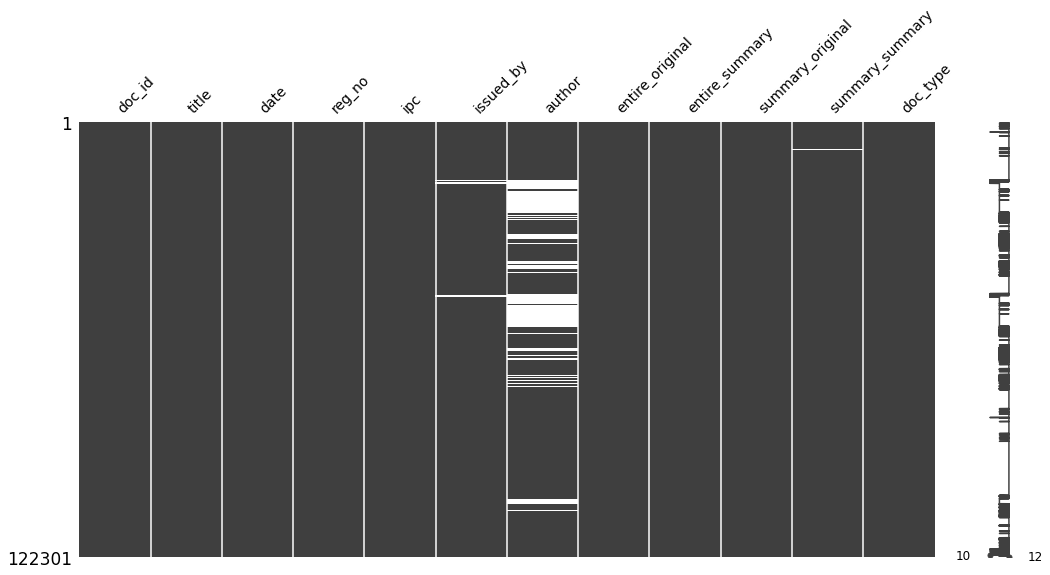

In [59]:
msno.matrix(train, figsize=(17,8), fontsize=14);

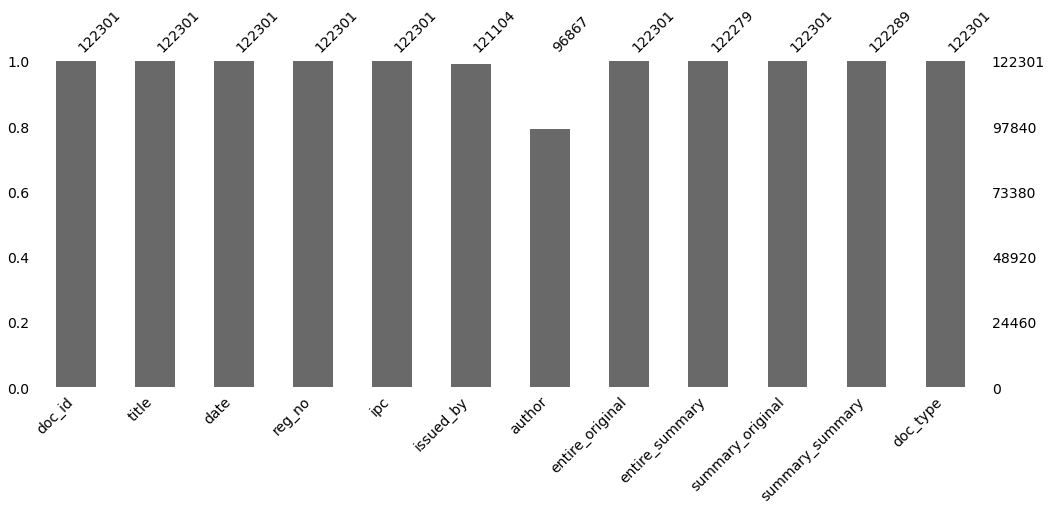

In [60]:
msno.bar(train, figsize=(17,6), fontsize=14);

In [61]:
for i in train.columns:
  null_rate = train[i].isna().sum() / len(train)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")

issued_by's null rate : 0.98%
author's null rate : 20.8%
entire_summary's null rate : 0.02%
summary_summary's null rate : 0.01%


### 결측치 부분 처리

In [62]:
train.loc[train.summary_summary.isna()]

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
1209,A200928005965,선진유가사상에서의 교육의 의미와 교육방법적 원리 탐색: 五部經典을 중심으로,2007,ART001075937,사회과학,사범대학부속중등교육연구소,장승희1,"선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","교육목적을 달성하기 위해 목표설정, 내용구성에 이어 훌륭한 교사가 ‘적절한 방법’...",NaN,논문
2843,A200928006595,멘토링 프로그램을 활용한 영재교육의 탐색,2009,ART002163953,사회과학,한국과학영재교육학회,"강완1 , 박만구2",본 연구는 영재교육에 있어서 학습자를 위한 맞춤식 교육으로 멘토링을 활용한 수학영재...,NaN,영재교육은 최근에 우리나라뿐만 아니라 세계의 모든 나라들에서 보다 관심을 가지고 영...,NaN,논문
2991,A200928007668,정지용 시에 나타난 존재론적 초월의 양상과 의미 Formation and Meani...,2016,ART002183386,인문학,한국문학이론과비평학회,김봉근 /Kim bong keun (단독)1,이 논문은 정지용의 전체 시 세계를 연대기적 흐름 속에서 존재론적 초월 양상이 어떻...,"정지용의 시쓰기는 역사적, 존재론적 결여를 극복해나가고자 하는 방향으로 진행되는...","모더니즘 문학의 선두에 섰던 정지용의 시를 일반적으로 초기의 모더니즘 시, 중기...",NaN,논문
7731,A200928010340,제501 오룡호 침몰사고 원인분석을 위한 선박 복원성 계산 Ship Stabilit...,2018,ART002426846,농수해양,한국항해항만학회,"이재석 /Jae-Seok Lee (제1)1 , 정영구 /Young-Gu Chung ...",원양어선 제501 오룡호는 황천 중인 베링해에서 조업 후 피항하던 중 개구부를 통한...,본 연구에서는 사고선박 침몰사고의 진행상황 별 유동수 영향과 어획물 배치 등을 고려...,사고선박 침몰사고의 진행상황 별 유동수 영향과 어획물 배치 등을 고려한 선박복원성 ...,NaN,논문
8400,A200928012536,"정서인식명확성, 정서표현, 정서적 지지가 심리적 수용에 미치는 영향 The Effe...",2018,ART002432985,사회과학,한국심리치료학회,"박정미 /Jung Mi Park (교신)1 , 정남운 /Chung Nan Woon ...",본 연구는 정서인식 명확성과 심리적 수용의 관계에서 정서표현과 정서적 지지의 매개효...,정서인식 명확성과 심리적 수용의 관계에서 정서표현과 정서적 지지의 매개효과를 확인하...,"ㅊ, summary_text:",NaN,논문
8840,A200928014067,일본 규슈 사가현의 문화관광에 관한 연구 -한국 문화와 역사인물 관련 장소를 중심으...,2019,ART002456558,사회과학,한국사진지리학회,"이혁진 /Hyuk-Jin Lee (제1)1 , 최화열 /Choi Hwa Yeol (...","본 연구는 일본 사가현의 지리적 배경, 지역관광 특징 및 한국 문화와 역사인물 관련...","일본 사가현의 지리적 배경, 지역관광 특징과 한국 문화와 역사인물 관련 장소성을 고...","사가현은 지리적으로 나가사키와 후쿠오카 사이에 위치하고 있기 때문에, 해상운송은 하...",NaN,논문
81489,A200928005965,선진유가사상에서의 교육의 의미와 교육방법적 원리 탐색: 五部經典을 중심으로,2007,ART001075937,사회과학,사범대학부속중등교육연구소,장승희1,"선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","교육목적을 달성하기 위해 목표설정, 내용구성에 이어 훌륭한 교사가 ‘적절한 방법’...",NaN,논문
83123,A200928006595,멘토링 프로그램을 활용한 영재교육의 탐색,2009,ART002163953,사회과학,한국과학영재교육학회,"강완1 , 박만구2",본 연구는 영재교육에 있어서 학습자를 위한 맞춤식 교육으로 멘토링을 활용한 수학영재...,NaN,영재교육은 최근에 우리나라뿐만 아니라 세계의 모든 나라들에서 보다 관심을 가지고 영...,NaN,논문
83271,A200928007668,정지용 시에 나타난 존재론적 초월의 양상과 의미 Formation and Meani...,2016,ART002183386,인문학,한국문학이론과비평학회,김봉근 /Kim bong keun (단독)1,이 논문은 정지용의 전체 시 세계를 연대기적 흐름 속에서 존재론적 초월 양상이 어떻...,"정지용의 시쓰기는 역사적, 존재론적 결여를 극복해나가고자 하는 방향으로 진행되는...","모더니즘 문학의 선두에 섰던 정지용의 시를 일반적으로 초기의 모더니즘 시, 중기...",NaN,논문
88011,A200928010340,제501 오룡호 침몰사고 원인분석을 위한 선박 복원성 계산 Ship Stabilit...,2018,ART002426846,농수해양,한국항해항만학회,"이재석 /Jae-Seok Lee (제1)1 , 정영구 /Young-Gu Chung ...",원양어선 제501 오룡호는 황천 중인 베링해에서 조업 후 피항하던 중 개구부를 통한...,본 연구에서는 사고선박 침몰사고의 진행상황 별 유동수 영향과 어획물 배치 등을 고려...,사고선박 침몰사고의 진행상황 별 유동수 영향과 어획물 배치 등을 고려한 선박복원성 ...,NaN,논문


In [63]:
# 예시로 살펴보는 사례 
# 1209번 index 추출 후 확인

train.iloc[[1209]]

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
1209,A200928005965,선진유가사상에서의 교육의 의미와 교육방법적 원리 탐색: 五部經典을 중심으로,2007,ART001075937,사회과학,사범대학부속중등교육연구소,장승희1,"선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","선진유가사상은 논어, 맹자, 주역, 중용, 대학의 오부경전을 통하여 그 본질을 파악...","교육목적을 달성하기 위해 목표설정, 내용구성에 이어 훌륭한 교사가 ‘적절한 방법’...",NaN,논문


In [64]:
train.iloc[1209]['summary_original']

' 교육목적을 달성하기 위해 목표설정, 내용구성에 이어 훌륭한 교사가 ‘적절한 방법’으로 학생들을 가르쳐야 하며,  교육방법은 그 자체의 의미뿐 아니라 목표․내용과의 유기적 관련 속에서 의미를 지닐 수 있어야 하고, 소박한 형태의 교육이라도 의도적인 인간활동이며, 달성하고자 하는 목적을 정점으로 목표, 내용, 방법이 유기적으로 연계되지 않을 수 없다. 따라서 유가의 교육방법에 대한 접근도 ‘儒家’의 개념규정이 선행되어야 이후 논의가 분명해질 것이며,  일반적으로 孔孟의 정신을 이어받아 발전시킨 사상을 유학, 유교, 유가란 명칭으로부른다. , summary_text: '

해당 부분을 추출하여 확인해본 결과 summary_text 이후의 부분은 적혀있지 않은 것으로 확인된다.
- 따라서 이 부분에 대한 데이터들은 삭제하는 것으로 결정하였다.

In [65]:
print(f'데이터 상에서 삭제할 행의 개수는 {len(train.loc[train.summary_summary.isna()])}개 입니다. ')

데이터 상에서 삭제할 행의 개수는 12개 입니다. 


In [66]:
train['issued_by'].fillna('NONE',inplace=True)
train['author'].fillna('NOne', inplace=True)
train.dropna(inplace=True)

print('train.isna().sum()\n')
print('-'*40)
print(f'train dataset의 shape : {train.shape}\n')
print(f'train dataset의 결측치: {train.isna().sum()}')

train.isna().sum()

----------------------------------------
train dataset의 shape : (122269, 12)

train dataset의 결측치: doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64


### 결측치 처리 후 csv 파일로 재변환

In [67]:
# new_train.csv 파일로 저장해주겠습니다.
train.to_csv('new_train.csv', index=False, encoding='utf-8')  # index =False 처리

# 추가: Validation dataset

validation dataset 역시 동일하게 진행합니다.

In [68]:
cd /content/drive/MyDrive/data/Article_summary/Validation/validation_논문

/content/drive/MyDrive/data/Article_summary/Validation/validation_논문


In [69]:
ls

논문요약_0224_0.json  논문요약_0225_6_2.json


In [70]:
with open('논문요약_0224_0.json', 'r', encoding = 'utf-8') as input_file:         # 첫 번째 validation 파일
  data7 = json.load(input_file)

with open('논문요약_0225_6_2.json', 'r', encoding = 'utf-8') as input_file:       # 두 번째 validation 파일
  data8 = json.load(input_file)

In [71]:
print(f'data7에 대한 key  : {data7.keys()}')
print(f'data8에 대한 key  : {data8.keys()}')

data7에 대한 key  : dict_keys(['totalcount', 'data'])
data8에 대한 key  : dict_keys(['totalcount', 'data'])


In [72]:
val1_data = {key:value for key,value in data7.items() if key !='totalcount'}
val2_data = {key:value for key,value in data8.items() if key !='totalcount'}

In [73]:
# data키 안에 있는 요소 추출
val1_data= val1_data.get('data')
val2_data= val2_data.get('data')

# 데이터프레임 형성
val_arti1= pd.DataFrame(val1_data)
val_arti2= pd.DataFrame(val2_data)

# 데이터프레임 병합
val_df= pd.concat([val_arti1,val_arti2],axis=0) # 위 아래로 이어붙여줄 것이다.
val_df.shape

(18061, 10)

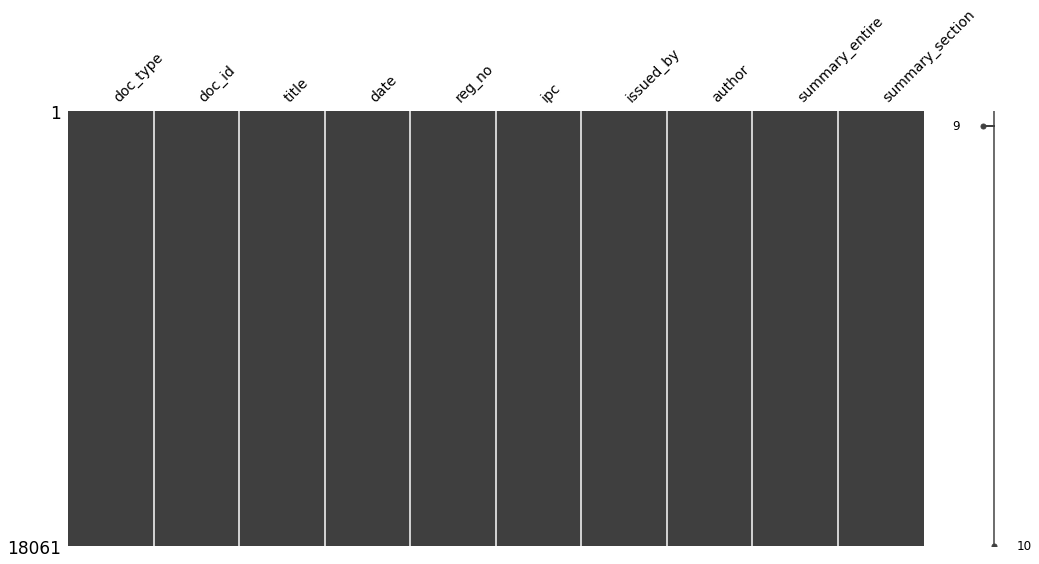

In [74]:
%matplotlib inline
msno.matrix(val_df, figsize=(17,8), fontsize=14);

In [75]:
val_df.isna().sum()

doc_type           0
doc_id             0
title              0
date               0
reg_no             0
ipc                0
issued_by          0
author             2
summary_entire     0
summary_section    0
dtype: int64

In [76]:
na_condition = val_df.loc[val_df['author'].isna()]
na_condition

,doc_type,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section
625,논문,A201007211999,중학교 과학 교사의 과학 탐구 교수 지향,2020,ART002614119,자연과학,대한화학회,NaN,[{'orginal_text': '본 연구는 1년간 동료 교사들과 과학 탐구 수업을...,[{'orginal_text': '과학 교수에서 무엇이 중요하고 교수-학습이 어떻게...
629,논문,A201007212003,손톱과 모발에서의 셀레노 화합물의 화학종 분석,2020,ART002614118,자연과학,대한화학회,NaN,[{'orginal_text': '손톱과 모발에서 셀레늄을 추출하고 HPLC-ICP...,"[{'orginal_text': '셀레늄(selenium, Se)은 비타민E의 2,..."


In [77]:
val_df.fillna('대한화학회',inplace=True)
val_df.isna().sum()

doc_type           0
doc_id             0
title              0
date               0
reg_no             0
ipc                0
issued_by          0
author             0
summary_entire     0
summary_section    0
dtype: int64

In [78]:
val_df.reset_index(drop=True, inplace=True)
val_df.head(3)

,doc_type,doc_id,title,date,reg_no,ipc,issued_by,author,summary_entire,summary_section
0,논문,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,[{'orginal_text': '배경: 현재 대변검경검사에서는 적절한 정도관리물질...,[{'orginal_text': '본 연구의 목적은 국내 임상 검사실에서 대변 검사...
1,논문,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,[{'orginal_text': '배경: Vibrio 종에는 치명적인 패혈증을 일으...,[{'orginal_text': '임상에서 분리된 Vibrio 균종의 동정에 16S...
2,논문,A201007211376,미세유체역학 혈액점도계 Viscore-300의 분석적 성능 평가 및 참고범위 설정,2018,ART002294283,의약학,대한진단검사의학회,권용준 (제1)|||이준형 (참여)|||문형섭 (참여)|||김혜란 (참여)|||최현...,[{'orginal_text': '배경: 전혈 점도는 혈액이 혈관을 통과할 때 발생...,[{'orginal_text': '혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 ...


In [79]:
entire_sum = val_df['summary_entire']
entire_sum = pd.DataFrame(entire_sum)

entire_sum = entire_sum.astype(str)       # 전처리를 위해 str로 변환해줌

entire_sum['entire_original']= entire_sum['summary_entire'].apply(text_original)
entire_sum['entire_summary'] = entire_sum['summary_entire'].apply(text_summary)

In [80]:
summary_sum = val_df['summary_section']
summary_sum = pd.DataFrame(summary_sum)

summary_sum = summary_sum.astype(str)

summary_sum['summary_original']= summary_sum['summary_section'].apply(text_original)
summary_sum['summary_summary'] = summary_sum['summary_section'].apply(text_summary)
summary_sum

,summary_section,summary_original,summary_summary
0,[{'orginal_text': '본 연구의 목적은 국내 임상 검사실에서 대변 검사...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...
1,[{'orginal_text': '임상에서 분리된 Vibrio 균종의 동정에 16S...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...
2,[{'orginal_text': '혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 ...,혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 발생하는 내부 저항을 의미하며 혈액...,혈액점도는 심혈관계 및 뇌혈관계질환과의 상관성이 밝혀져 왔으며 혈액 점도측정을 통한...
3,[{'orginal_text': '현재로는 GDF11이 “젊음의 약”이 될지 아닐지...,현재로는 GDF11이 “젊음의 약”이 될지 아닐지는 더 많은 재현성이 증명될 때까지...,현재로는 GDF11이 “젊음의 약”이 될지 아닐지는 더 많은 재현성이 증명될 때까지...
4,[{'orginal_text': '본 연구에서는 암환자를 위한 김치를 개발하기 위하...,본 연구에서는 암환자를 위한 김치를 개발하기 위하여 김치에 겨우살이 물추출물을 첨가...,본 연구에서는 암환자를 위한 김치를 개발하기 위하여 김치에 겨우살이 물추출물을 첨가...
...,...,...,...
18056,[{'orginal_text': '한 민족의 정체성을 형성하는 결정적인 요소 중의 ...,한 민족의 정체성을 형성하는 결정적인 요소 중의 하나는 그 민족의 공통된 ‘전통’이...,한 민족의 정체성을 형성하는 결정적인 요소 중의 하나는 그 민족의 공통된 ‘전통’이...
18057,[{'orginal_text': '고려 말을 대표하는 麗末三師와 嗣承관계에 의한 證...,"고려 말을 대표하는 麗末三師와 嗣承관계에 의한 證明三和尙에 모두 속하는 나옹은, 麗...","고려 말을 대표하는 麗末三師와 嗣承관계에 의한 證明三和尙에 모두 속하는 나옹은, 麗..."
18058,[{'orginal_text': '역사인물의 삶에 관심을 갖고 끊임없이 이야기하는 ...,역사인물의 삶에 관심을 갖고 끊임없이 이야기하는 것은 역사 인물의 삶이 일회적이고 ...,역사인물의 삶에 관심을 갖고 끊임없이 이야기하는 것은 역사 인물의 삶이 일회적이고 ...
18059,[{'orginal_text': '문명이 아니더라도 강에는 강을 생업의 터전으로 하...,문명이 아니더라도 강에는 강을 생업의 터전으로 하는 어부(漁夫)들과 강을 오르내리던...,문명이 아니더라도 강에는 강을 생업의 터전으로 하는 어부들과 강을 오르내리던 소금배...


In [81]:
val_df['entire_original'] = entire_sum['entire_original']
val_df['entire_summary']  = entire_sum['entire_summary']
val_df['summary_original'] = summary_sum['summary_original']
val_df['summary_summary'] = summary_sum['summary_summary']

val_df.drop(columns=['summary_entire','summary_section'],axis=1,inplace=True)
val_df.columns

Index(['doc_type', 'doc_id', 'title', 'date', 'reg_no', 'ipc', 'issued_by',
       'author', 'entire_original', 'entire_summary', 'summary_original',
       'summary_summary'],
      dtype='object')

In [82]:
val_df = val_df[['doc_id','title','date','reg_no','ipc','issued_by','author','entire_original','entire_summary','summary_original','summary_summary','doc_type']]
val_df.head()

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,배경: 현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다....,본 연구에서는 설사변에서 발견되는 장내 기생충 현황과 대변 검경에 있어 활용 가능한...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,논문
1,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,배경: Vibrio 종에는 치명적인 패혈증을 일으키는 균종들도 포함되어 있어서 정확...,Vibrio 균종의 정확한 동정을 위해 적절한 분자 진단법의 도입이 필요하기에 본고...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,논문
2,A201007211376,미세유체역학 혈액점도계 Viscore-300의 분석적 성능 평가 및 참고범위 설정,2018,ART002294283,의약학,대한진단검사의학회,권용준 (제1)|||이준형 (참여)|||문형섭 (참여)|||김혜란 (참여)|||최현...,배경: 전혈 점도는 혈액이 혈관을 통과할 때 발생하는 내부 저항을 의미한다. 이러한...,전혈 점도 측정을 위해 새로 개발된 미세유체역학 혈액점도계 Viscore-300 (...,혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 발생하는 내부 저항을 의미하며 혈액...,혈액점도는 심혈관계 및 뇌혈관계질환과의 상관성이 밝혀져 왔으며 혈액 점도측정을 통한...,논문
3,A201007211377,개체병렬결합 그리고 노화 연구,2017,ART002295675,자연과학,한국생명과학회,"정경태 /Chung, Kyung Tae (단독)",대부분의 사람은 오래 살기를 원한다. 고대 중국과 한국의 신화에 동방삭이라는 인물이...,"본고는 개체병렬결합모델의 탄생과 이로 인한 중요한 발견을 시간대에 따라 소개하며, ...",현재로는 GDF11이 “젊음의 약”이 될지 아닐지는 더 많은 재현성이 증명될 때까지...,현재로는 GDF11이 “젊음의 약”이 될지 아닐지는 더 많은 재현성이 증명될 때까지...,논문
4,A201007211378,겨우살이 물추출물 첨가 김치의 A549 인체 폐암 세포 증식저해 효과,2017,ART002295664,자연과학,한국생명과학회,길정하 /Jeung-Ha Kil (단독),"김치는 한국에서 가장 인기 있는 발효식품이며, 여러 연구에서 암예방, 항비만, 항염...","본 실험에서는 암환자용 김치의 암세포 증식억제능 및 그 기전에 대하여 검토하고, 인...",본 연구에서는 암환자를 위한 김치를 개발하기 위하여 김치에 겨우살이 물추출물을 첨가...,본 연구에서는 암환자를 위한 김치를 개발하기 위하여 김치에 겨우살이 물추출물을 첨가...,논문


In [83]:
val_df.isna().sum()

doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

### validation dataset CSV 변환

In [84]:
val_df.to_csv('validation_article.csv',  index=False, encoding='utf-8')

In [85]:
ls

논문요약_0224_0.json  논문요약_0225_6_2.json  validation_article.csv


validation_article.csv 파일 역시 추출하여 다시 결측치를 확인해보겠습니다.

In [86]:
validation_df = pd.read_csv('validation_article.csv')
validation_df.head(3)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,배경: 현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다....,본 연구에서는 설사변에서 발견되는 장내 기생충 현황과 대변 검경에 있어 활용 가능한...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,논문
1,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,배경: Vibrio 종에는 치명적인 패혈증을 일으키는 균종들도 포함되어 있어서 정확...,Vibrio 균종의 정확한 동정을 위해 적절한 분자 진단법의 도입이 필요하기에 본고...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,논문
2,A201007211376,미세유체역학 혈액점도계 Viscore-300의 분석적 성능 평가 및 참고범위 설정,2018,ART002294283,의약학,대한진단검사의학회,권용준 (제1)|||이준형 (참여)|||문형섭 (참여)|||김혜란 (참여)|||최현...,배경: 전혈 점도는 혈액이 혈관을 통과할 때 발생하는 내부 저항을 의미한다. 이러한...,전혈 점도 측정을 위해 새로 개발된 미세유체역학 혈액점도계 Viscore-300 (...,혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 발생하는 내부 저항을 의미하며 혈액...,혈액점도는 심혈관계 및 뇌혈관계질환과의 상관성이 밝혀져 왔으며 혈액 점도측정을 통한...,논문


In [87]:
validation_df.isna().sum()

doc_id                 0
title                  0
date                   0
reg_no                 0
ipc                    0
issued_by              0
author              5822
entire_original        0
entire_summary         0
summary_original       0
summary_summary        0
doc_type               0
dtype: int64

해당 데이터셋에서도 보이지 않는 결측치가 포함되어 있던 것으로 보입니다.

해당 데이터셋 역시 결측치를 동일하게 처리하겠습니다.

In [88]:
validation_df.loc[validation_df.author.isna()].head(3)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
4626,A201007216000,"전략 연구의 쟁점: 개념, 측정 및 유형화를 중심으로",2003,ART000902113,사회과학,한국전략경영학회,NaN,본 논문은 전략 연구에 있어서 가장 기본적인 요소이면서도 흔히 많은 연구들이 간과하...,본 논문은 개념의 오용이 빈번하게 나타나고 있는 전략의 주요 쟁점을 규명하고 이를 ...,전략유형의 도출에 앞서 전략 측정방법에 대한 제 접근법을 논의할 필요가 있다. 전략...,묘사법은 이러한 전략의 개념적 발전에는 어느 정도 시사점이 있지만 상이한 상황에서 ...,논문
4627,A201007216001,Form과 Function의 기호학적 해석을 중심으로 한 광고 커뮤니케이션 전략전개,2004,ART000937627,예술체육,한국기초조형학회,NaN,오늘날 광고 크리에이티브 디렉터들은 효과있는 광고 커뮤니케이션 전략 수립을 위해 많...,광고 커뮤니케이션 전략 수립 시 형식 중시형과 기능 중시형 중 어느 쪽에 중점을 두...,최근의 크리에이티브 디렉터들은 형식 중시형(form-orien ted)된 광고를 추...,최근의 크리에이티브 디렉터들은 형식 중시형된 광고를 추구하는 경향이 많아 조금 독특...,논문
4628,A201007216002,주거공간 실내디자인에 나타난 비물질적 특성에 관한 연구,2004,ART000939200,예술체육,한국기초조형학회,NaN,현대 공간에서 나타나는 비물질성의 개념과 현대 공간디자인에서의 비물질적 특성과 유형...,"국내 주거공간 실내디자인에 표현되는 비물질적 특성을 파악한 결과, 이 특성은 표현적...",현대의 공간디자인은 진보된 기술로 인하여 다양한 표현과 지원이 가능하게 되었다. 건...,국내 주거공간에 나타난 매체적 특성 중 일시성의 표현은 디지털 기술과 조명기술 등의...,논문


해당 부분을 None으로 처리해주겠습니다.

In [89]:
validation_df.fillna('None', inplace=True)

In [90]:
# 결측치를 다시 확인합니다.
validation_df.isna().sum()

doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

new_validation.csv 파일로 저장해주었습니다.

In [91]:
validation_df.to_csv('new_validation.csv', index=False, encoding='utf-8')

### new_validation.csv 파일 재확인

In [92]:
new_val_df = pd.read_csv('new_validation.csv')
new_val_df.head(3)

,doc_id,title,date,reg_no,ipc,issued_by,author,entire_original,entire_summary,summary_original,summary_summary,doc_type
0,A201007211374,국내 검사실에서의 대변 검경 검사에 대한 내부정도관리 현황,2018,ART002294415,의약학,대한진단검사의학회,권용준 (제1)|||원은정 (교신)|||기승정 (참여)|||김수현 (참여)|||신명...,배경: 현재 대변검경검사에서는 적절한 정도관리물질이 없어 질관리가 미진한 실정이다....,본 연구에서는 설사변에서 발견되는 장내 기생충 현황과 대변 검경에 있어 활용 가능한...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,본 연구의 목적은 국내 임상 검사실에서 대변 검사의 내부정도 관리 현황을 파악하기 ...,논문
1,A201007211375,Vibrio 임상 분리주의 균종 동정을 위한 dnaJ 및 16S rDNA의 서열 분...,2018,ART002294295,의약학,대한진단검사의학회,최인선 (제1)|||문대수 (참여)|||박 건 (참여)|||강성호 (참여)|||김춘...,배경: Vibrio 종에는 치명적인 패혈증을 일으키는 균종들도 포함되어 있어서 정확...,Vibrio 균종의 정확한 동정을 위해 적절한 분자 진단법의 도입이 필요하기에 본고...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,임상에서 분리된 Vibrio 균종의 동정에 16S rDNA 서열 분석법과 dnaJ ...,논문
2,A201007211376,미세유체역학 혈액점도계 Viscore-300의 분석적 성능 평가 및 참고범위 설정,2018,ART002294283,의약학,대한진단검사의학회,권용준 (제1)|||이준형 (참여)|||문형섭 (참여)|||김혜란 (참여)|||최현...,배경: 전혈 점도는 혈액이 혈관을 통과할 때 발생하는 내부 저항을 의미한다. 이러한...,전혈 점도 측정을 위해 새로 개발된 미세유체역학 혈액점도계 Viscore-300 (...,혈액 점도는 인체의 혈관 내에서 혈액이 흐를 때 발생하는 내부 저항을 의미하며 혈액...,혈액점도는 심혈관계 및 뇌혈관계질환과의 상관성이 밝혀져 왔으며 혈액 점도측정을 통한...,논문


In [93]:
new_val_df.isna().sum()

doc_id              0
title               0
date                0
reg_no              0
ipc                 0
issued_by           0
author              0
entire_original     0
entire_summary      0
summary_original    0
summary_summary     0
doc_type            0
dtype: int64

해당 데이터셋이 잘 저장되었음을 확인하였습니다.